# Introducción a las Redes Naturales Artificiales

## Perceptrones

Los perceptrones son la unidad más sencilla de una arquitectura de una red neuronal artificial (RNA).

**Dato**: El término perceptrón fue inventado por Frank Rosenblatt en 1957 basándose en una neurona artificial llamada _Threshold Logic Unit (Unidad Lógica Umbral)_ o _Linear Threshold Unit (Unidad Umbral Lineal)_.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [32]:
iris = load_iris()

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [21]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Dividimos el conjunto de datos en entrenamiento y validación:

In [38]:
X = iris.data[:, (2, 3)] # X es el conjunto de petal length y petal width
y = (iris.target == 0).astype(np.int) # y es el conjunto del tipo Iris-Setosa

Definimos un modelo de perceptrón con los hiperparámetros indicados y ajustamos el conjunto de datos:

In [28]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Con el modelo entrenado podemos predecir:

In [107]:
# ¿Una flor iris con pétalos de 2 cm de largo y de 0.5 cm ancho es del tipo Setosa?
y_pred = per_clf.predict([[2, 0.5]])
y_pred # ¡Sí!

array([1])

In [64]:
#per_clf.get_params(deep=True)

In [83]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes [2], axes[3],200).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

In [74]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

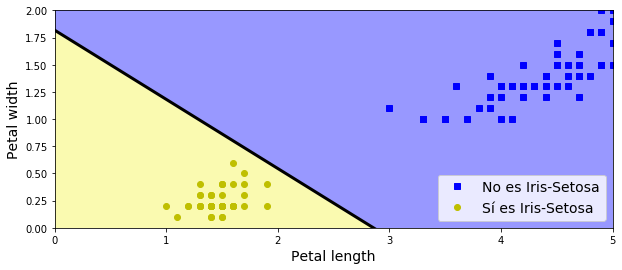

In [92]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="No es Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Sí es Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()